In [28]:
import numpy as np
import pandas as pd
from math import *
from scipy.stats import norm
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from tqdm import tqdm
import scipy as sc
from statistics import mean, median

In [ ]:
# !pip install plotly --upgrade

In [46]:
def get_x_y():
    x= [x for x in range(1,501)]
    y = [sqrt(0.05*k)+np.random.normal(0,1,1) for k in range(1,501)]
    return x,y
# x= [x for x in range(1,501)]
# y = [sqrt(0.05*k)+np.random.normal(0,1,1) for k in x]

In [3]:
x_, y_ = get_x_y()
y_ = np.concatenate(y_, axis=0)
# sqrt_y = np.sqrt(y_)
sqrt_x = [sqrt(0.05*k) for k in x_]
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_, y=y_, mode='markers', name='$$Dots$$'))
fig.add_trace(go.Scatter(x=x_, y=sqrt_x, name='$f(x) = \sqrt{x}$'))
fig.update_layout(
                  title="First visualization",
                  xaxis_title="X",
                  yaxis_title="Y",)
#                   margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [4]:
def moving_averanges(m,x,y):
    for i in range(len(y)-m+1):
        yield 1/(m)*sum(y[i:i+m])

def moving_medians(m,x,y):
    for i in range(len(y)-m+1):
        yield np.median(y[i:i+m])

In [29]:
def moving_med(sample, window: int):
    gap = int((window - 1) / 2)
    output = [median([sample[0], sample[1], 3*sample[1] - 2*sample[2]])]
    for i in range(1, gap):
        output.append(median(sample[:2*i]))
    for i in range(gap, len(sample) - gap):
        output.append(median(sample[i-gap:i+gap]))
    for i in range(len(sample) - gap, len(sample)):
        output.append(median(sample[2*i - 2*len(sample):]))  # negative index

    output[-1] = median([sample[-1], sample[-2], 3*sample[-2] - 2*sample[-3]])
    return output

In [25]:
def moving_avg(sample, window: int):
    gap = int((window - 1) / 2)
    output = [sample[0]]
    for i in range(1, gap):
        output.append(np.mean(sample[:2*i]))
    for i in range(gap, len(sample) - gap):
        output.append(np.mean(sample[i-gap:i+gap]))
    for i in range(len(sample) - gap, len(sample)):
        output.append(np.mean(sample[2*i - 2*len(sample):]))  # negative index

    return output

In [16]:
def get_slice_index(m):
    return int((m-1)/2)

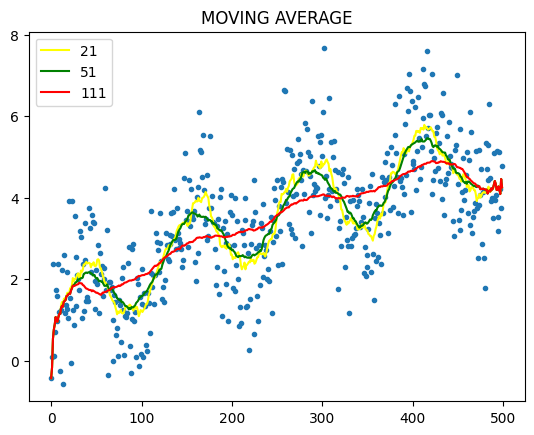

In [49]:
h = 0.05
sample_size = 500
norm_d = sc.stats.norm.rvs(0, 1, sample_size)
my_d = [sin(k*h) + (k*h) ** 0.5 + norm_d[k] for k in range(sample_size)]

plt.plot(range(sample_size), my_d, '.')
plt.plot(range(sample_size), moving_avg(my_d, 21), 'yellow', label='21')
plt.plot(range(sample_size), moving_avg(my_d, 51), 'green', label='51')
plt.plot(range(sample_size), moving_avg(my_d, 111), 'red', label='111')
plt.title('MOVING AVERAGE')
plt.legend()

In [17]:
def get_graph_averanges(arr_of_m):
    fig = go.Figure()
    for m in arr_of_m:
        x, y = get_x_y()
#         x = list(moving_medians(500, _x, _y))
        border = get_slice_index(m)
        fig.add_trace(go.Scatter(x=x[1:], y=moving_avg(y, m)[1:],name=f'Ширина окна = {m}'))
    sqrt_x = [sqrt(0.05*k) for k in x_]
    fig.add_trace(go.Scatter(x=x_, y=y_, mode='markers', name='$$Dots$$'))
    fig.add_trace(go.Scatter(x=x_, y=sqrt_x, name='$f(x) = \sqrt{x}$'))
    fig.update_layout(
                      title="Moving averanges",
                      xaxis_title="X",
                      yaxis_title="Y",)
    fig.show()

In [27]:
# get_graph_averanges([11,21,51,111])

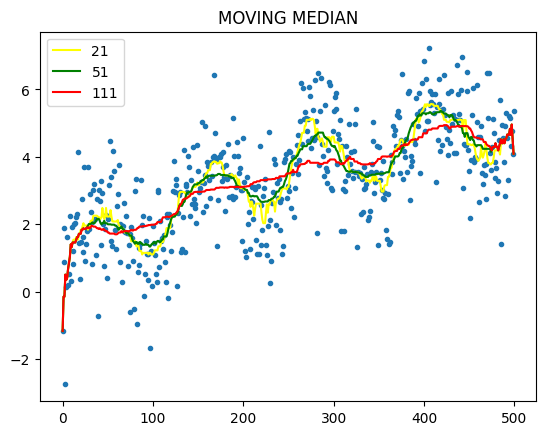

In [30]:
plt.plot(range(sample_size), my_d, '.')
plt.plot(range(sample_size), moving_med(my_d, 21), 'yellow', label='21')
plt.plot(range(sample_size), moving_med(my_d, 51), 'green', label='51')
plt.plot(range(sample_size), moving_med(my_d, 111), 'red', label='111')
plt.title('MOVING MEDIAN')
plt.legend()

In [31]:
# get_graph_medians([11,21,51,111])

In [33]:
def get_graph_compare(m):
    fig = go.Figure()
    x, y = get_x_y()
    fig.add_trace(go.Scatter(x=x_, y=y_, mode='markers', name='$$Dots$$'))
    fig.add_trace(go.Scatter(x=x_, y=sqrt_x, name='$f(x) = \sqrt{x}$'))
    border = get_slice_index(m)
    fig.add_trace(go.Scatter(x=x[1:], y=moving_med(y,m)[1:],name=f'Ширина окна = {m}, medians'))
    fig.add_trace(go.Scatter(x=x[1:], y=moving_avg(y, m)[1:],name=f'Ширина окна = {m}, averanges'))
    fig.update_layout(
                      title="Compare medians and averanges",
                      xaxis_title="X",
                      yaxis_title="Y",)
    fig.show()

In [34]:
get_graph_compare(111)

In [ ]:
def get_noise(n, x, y, trend):
    border = get_slice_index(n)
    y = np.array(y)
#     trend = np.array(list(moving_averanges(n,x,y)))
    noise = y[1:] - trend[1:]
    return noise


In [ ]:
def countof_turningpoints(lst):
    dx = np.diff(lst,axis=0)
    return np.sum(dx[1:] * dx[:-1] < 0)


In [ ]:
# trend = moving_avg(y,11)
# a = get_noise(11, x, y, trend)
# countof_turningpoints(a)

In [50]:
avg_21 = moving_avg(my_d, 21)
med_21 = moving_med(my_d, 21)

noise_avg = np.array(my_d) - np.array(avg_21)
noise_med = np.array(my_d) - np.array(med_21)

In [51]:
def turn_point(lst):
    dx = np.diff(lst, axis=0)
    return np.sum(dx[1:] * dx[:-1] < 0)

th_val = (2/3) * (sample_size - 2)

print('Turn points criteria')
print('Theoretical value: ', th_val)
print('Experiment value minus noise_avg: ', turn_point(noise_avg))
print('Experiment value minus noise_med: ', turn_point(noise_med))

Turn points criteria
Theoretical value:  332.0
Experiment value minus noise_avg:  338
Experiment value minus noise_med:  342


In [53]:
def Kendal(noise):
    count = 0
    n = len(noise)
    for i in range(len(noise)):
        for j in range(i):
            if noise[i] > noise[j]:
                count +=1
    return 4*count/(n*(n-1)) - 1

print('Kendall criteria')
print('Experiment value minus noise_avg: ', Kendal(noise_avg))
print('Experiment value minus noise_med: ', Kendal(noise_med))

Kendall criteria
Experiment value minus noise_avg:  -0.0061723446893787726
Experiment value minus noise_med:  0.0014108216432866527
